In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_svmlight_file

In [3]:
X_train, y_train = load_svmlight_file("/Users/qingpeng/Local/GeneLearn/training.vect") 

In [4]:
X_test, y_test = load_svmlight_file("/Users/qingpeng/Local/GeneLearn/testing.vect", n_features=X_train.shape[1])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [6]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,precision_recall_curve

In [7]:
logreg = linear_model.LogisticRegression(C=0.0001)

In [8]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
prediction = logreg.predict(X_test)

In [10]:
probability = logreg.predict_proba(X_test)

In [11]:
matrix = confusion_matrix(y_test, prediction)

In [12]:
matrix

array([[3827, 1173],
       [ 357, 4643]])

In [13]:
probability_2 = [i[1] for i in probability]

In [14]:
au_PRC = average_precision_score(y_test, probability_2)

In [15]:
au_PRC

0.95378841014945115

In [16]:
from sklearn.externals import joblib

In [17]:
joblib.dump(logreg, 'logreg.pkl') 

['logreg.pkl']

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_2)

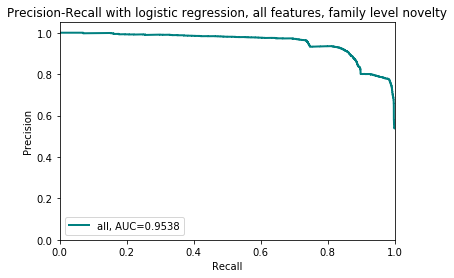

In [19]:
lw = 2
plt.figure(figsize=(6, 4), dpi=80)

# Plot Precision-Recall curve
plt.clf()

plt.plot(recall, precision, lw=lw, color='teal',
         label='all, AUC={0:0.4f}'.format(au_PRC))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall with logistic regression, all features, family level novelty')
plt.legend(loc="lower left")
plt.show()

## Using Scikit-learn to train on full set with/without pfam


With Pfam: auPRC: 0.92773389301108267



No Pfam: auPRC: 0.50460780673422356

>>> matrix
array([[5000,    0],
       [5000,    0]])
       
Need investigation!



